**Copyright: © NexStream Technical Education, LLC**.  
All rights reserved

**Z-scores:**

Using the numpy, scipy.stats, and matplotlib libraries, write a function that calculates the z-scores for a dataset comprised of the following values.  

Calculate the mean, standard deviation, and Z-scores for the dataset.  
Plot the data and Z-scores on two separate dot plots.  
Upload screenshots of your output and plots.  

Note:  see Significance lecture modules for details on this question and the steps.  


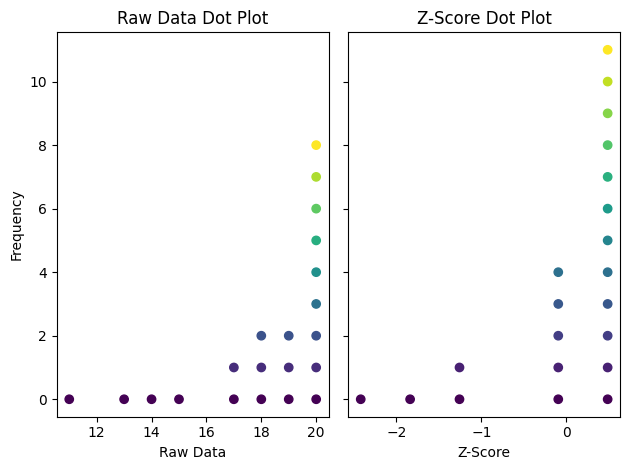

[11 13 14 15 17 17 18 18 18 19 19 19 20 20 20 20 20 20 20 20 20]
Data mean: 18.0
Data standard deviation 2.6457513110645907
-2.7 -1.9 -1.5 -1.2 -0.4 -0.4 0.0 0.0 0.0 0.4 0.4 0.4 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 
Z-score mean 0.0
Z-score standard deviation 1.02469507659596


TestResults(failed=0, attempted=3)

In [32]:
#Assignment - after Significance tests
#1 z-score calculation and plots from unit 030 example

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


# Calculate the z-score
# z-score tells us how many standard deviations away an individual value is from the mean
# calc mean and stddev then use stats lib functions to generate the zscores
# Note, if using numpy.std, use the 'sample' standard deviation (ddof parameter)
# https://numpy.org/doc/stable/reference/generated/numpy.std.html

def calc_zscores(data1):
  #data1 is the input data list
  #return mean, standard deviation, and z-scores
  ####Your code here...
    mean = np.mean(data1)
    stddev = np.std(data1,ddof=1)
    #stddev=round(np.std(data1, ddof=1), 2)
    #zscores = (data1 - mean) /stddev
    zscores = stats.zscore(data1)



    return mean, stddev, zscores

#Plot raw data and standardized data (zScores) on a dot plot using a mapped histogram
#Ref: https://stackoverflow.com/questions/49703938/how-to-create-a-dot-plot-in-matplotlib-not-a-scatter-plot

def plot_dot(data1, zScores):
  #Uses matplot lib histogram to plot raw data and standardized scores (zScores)
  #NOTE:  This assumes input list of 21 points.  If this is changed then need to update
  #       binsStand, xStand for proper binning.
  #data1 is the raw input data
  #zScores are the computed standardized scores (zScores)

  # Plot the raw quiz scores and standardized quiz scores (i.e. z-scores) using a dotplot
  fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

  # Hint:
  # use np.arange, np.histogram, np.meshgrid, and matplotlib scatter functions

  ####Your code here...
def plot_dot(data1, zScores):
    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

    # Define custom bins for raw data to ensure each integer is represented
    bins = np.arange(min(data1) - 0.5, max(data1) + 1.5, 1)  # Bins for each integer value

    # Raw data histogram
    hist, bin_edges = np.histogram(data1, bins=bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    x, y = np.meshgrid(bin_centers, np.arange(np.max(hist) + 1))

    mask = y < hist
    axs[0].scatter(x[mask], y[mask], c=y[mask])
    axs[0].set_title("Raw Data Dot Plot")
    axs[0].set_xlabel("Raw Data")
    axs[0].set_ylabel("Frequency")

    #bins_z = np.arange(-3, 1, 0.2)  # Bins from -3 to +3 with a step of 0.5
    bins_z = np.arange(-3, 3.5, 0.1)
    # Z-score histogram
    hist_z, bin_edges_z = np.histogram(zScores, bins='auto')
    bin_centers_z = (bin_edges_z[:-1] + bin_edges_z[1:]) / 2
    x_z, y_z = np.meshgrid(bin_centers_z, np.arange(np.max(hist_z) + 1))

    mask_z = y_z < hist_z
    axs[1].scatter(x_z[mask_z], y_z[mask_z], c=y_z[mask_z])
    axs[1].set_title("Z-Score Dot Plot")
    axs[1].set_xlabel("Z-Score")

    plt.show()




    # Show the plot




#-------------------------------------------------------------------------------------------------
#Test with the following doctest test vectors.
#DO NOT EDIT THE TEST CODE!!!!
#Even changing the spacing can cause errors.
#The test code will automatically execute when you run the cell.
#You should test all your combination of outputs but your code at least must pass these exact tests.
#If your code fails, you will see a description in the console cell.
#If your code passes, you will see the message: "TestResults(failed=0, attempted=X)" where X is the number of tests.

import doctest

data = np.array([11, 13, 14, 15, 17, 17, 18, 18, 18, 19,
                  19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20])
dataMean, dataStddev, dataZscores = calc_zscores(data)
zScoreMean, zScoreStddev, dummy = calc_zscores(dataZscores)
plot_dot(data, dataZscores)

print(data)
print('Data mean:', dataMean)
print('Data standard deviation', dataStddev)
print('%1.1f '*len(dataZscores) % tuple(dataZscores))
print('Z-score mean', zScoreMean)
print('Z-score standard deviation', zScoreStddev)


"""
  >>> print('%.1f, %.2f' %(dataMean, dataStddev))
  18.0, 2.65
  >>> print(np.round(dataZscores, 2))
  [-2.71 -1.94 -1.55 -1.16 -0.39 -0.39  0.    0.    0.    0.39  0.39  0.39
    0.77  0.77  0.77  0.77  0.77  0.77  0.77  0.77  0.77]
  >>> print('%.1f, %.1f' %(zScoreMean, zScoreStddev))
  0.0, 1.0
"""

doctest.testmod()
